In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from sklearn import svm
from scipy.stats import norm
import matplotlib.pyplot as plt

C:\Users\Huang\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Read data from files

In [2]:
companies = ['MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DWDP','XOM',
             'GE','GS','HD','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT',
             'NKE','PFE','PG','TRV','UNH','UTX','VZ','V','WMT','DIS']

df = None
for company in companies:
    temp_df = pd.read_excel('data\{}.xlsx'.format(company,na_value='nan'))
    if df is None:
        df = temp_df
    else:
        df = df.append(temp_df,ignore_index = True)
    
# rename variables
df = df.rename(index=str,columns={'OptType':'CallPut','Spot':'S','Strike':'K','Rate':'rd','DvYd':'q','IVM':'sigma','DyEx':'T','Mid':'Option Price'})

In [4]:
# drop Ticker and Volm to make the dataset
dataset = df.drop(labels=['Ticker','Volm','sigma'],axis=1)
# column names
colname = dataset.columns.values
print('Input Varaibles: ')
print(dataset.columns.values[:-1])
print("Output Variable")
print(dataset.columns.values[-1])

# drop sigma=0
#dataset = dataset[dataset['sigma']!=0]
# transform T to year
dataset['T'] = dataset['T']/365
# change rd,q,sigma into percent
dataset['rd'] = dataset['rd']/100
dataset['q'] = dataset['q']/100
#dataset['sigma'] = dataset['sigma']/100

# transform dataframe into numpy array and shuffle the data
dataset = np.array(dataset)
np.random.shuffle(dataset)

X = dataset[:,:-1]
Y = dataset[:,-1].reshape(-1,1)

# normalize X
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

Input Varaibles: 
['CallPut' 'S' 'K' 'rd' 'q' 'T']
Output Variable
Option Price


### Train test split

In [6]:
test_ratio = 0.2
num_test = int(test_ratio*dataset.shape[0])
X_test = X[:num_test]
X_train = X[num_test:]
Y_test = Y[:num_test]
Y_train = Y[num_test:]

### Train the Neural Network

In [8]:
model = Sequential()
#model.add(BatchNormalization(input_shape=[7]))
model.add(Dense(128, input_shape = [6], activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1, activation ='relu'))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

hist = model.fit(x=X_train,y=Y_train, epochs=500, batch_size=64, validation_split=0.2, verbose=1,shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________
Train on 9081 samples, validate on 2271 samples
Epoch 1/500
9081/9081 [==============================] - 0s 37us/step - loss: 734.8297 - val_loss: 755.8523
Epoch 2/500
9081/9081 [==============================] - 0s 22us/step - loss: 423.1769 - val_loss: 218.4678
Epoch 3/500
9081/9081 [==============================] - 0s 23us/step - loss: 222.3777 - val_loss: 146.1943
Epoch 4/500
9081/9081 [=======

9081/9081 [==============================] - 0s 28us/step - loss: 10.4404 - val_loss: 10.8672
Epoch 147/500
9081/9081 [==============================] - 0s 26us/step - loss: 13.7448 - val_loss: 10.0779
Epoch 148/500
9081/9081 [==============================] - 0s 31us/step - loss: 10.7247 - val_loss: 9.3991
Epoch 149/500
9081/9081 [==============================] - 0s 27us/step - loss: 10.2852 - val_loss: 10.7954
Epoch 150/500
9081/9081 [==============================] - 0s 31us/step - loss: 10.6711 - val_loss: 10.2766
Epoch 151/500
9081/9081 [==============================] - 0s 27us/step - loss: 10.3532 - val_loss: 9.3925
Epoch 152/500
9081/9081 [==============================] - 0s 31us/step - loss: 10.3748 - val_loss: 9.7851
Epoch 153/500
9081/9081 [==============================] - 0s 28us/step - loss: 11.7690 - val_loss: 9.6466
Epoch 154/500
9081/9081 [==============================] - 0s 31us/step - loss: 10.2552 - val_loss: 9.3431
Epoch 155/500
9081/9081 [======================

9081/9081 [==============================] - 0s 30us/step - loss: 9.6153 - val_loss: 8.9978
Epoch 300/500
9081/9081 [==============================] - 0s 29us/step - loss: 9.6656 - val_loss: 8.8959
Epoch 301/500
9081/9081 [==============================] - 0s 29us/step - loss: 10.6613 - val_loss: 9.0742
Epoch 302/500
9081/9081 [==============================] - 0s 29us/step - loss: 9.6939 - val_loss: 9.1760
Epoch 303/500
9081/9081 [==============================] - 0s 26us/step - loss: 9.6022 - val_loss: 9.2861
Epoch 304/500
9081/9081 [==============================] - 0s 28us/step - loss: 9.7121 - val_loss: 9.1823
Epoch 305/500
9081/9081 [==============================] - 0s 28us/step - loss: 9.7236 - val_loss: 8.9916
Epoch 306/500
9081/9081 [==============================] - 0s 26us/step - loss: 9.7038 - val_loss: 9.0308
Epoch 307/500
9081/9081 [==============================] - 0s 27us/step - loss: 9.8047 - val_loss: 12.7164
Epoch 308/500
9081/9081 [==============================] -

9081/9081 [==============================] - 0s 27us/step - loss: 9.4383 - val_loss: 9.9822
Epoch 377/500
9081/9081 [==============================] - 0s 30us/step - loss: 9.4179 - val_loss: 9.3855
Epoch 378/500
9081/9081 [==============================] - 0s 28us/step - loss: 9.8092 - val_loss: 9.1714
Epoch 379/500
9081/9081 [==============================] - 0s 28us/step - loss: 9.4105 - val_loss: 11.6911
Epoch 380/500
9081/9081 [==============================] - 0s 29us/step - loss: 9.5390 - val_loss: 9.0897
Epoch 381/500
9081/9081 [==============================] - 0s 27us/step - loss: 9.8315 - val_loss: 10.1982
Epoch 382/500
9081/9081 [==============================] - 0s 29us/step - loss: 9.7642 - val_loss: 9.3238
Epoch 383/500
9081/9081 [==============================] - 0s 27us/step - loss: 10.0273 - val_loss: 16.9226
Epoch 384/500
9081/9081 [==============================] - 0s 28us/step - loss: 9.6620 - val_loss: 10.4109
Epoch 385/500
9081/9081 [==============================

### Train and cross validation mean squared error

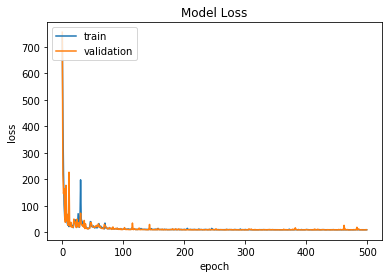

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

### Evaluate test set

In [9]:
predicted = model.predict(X_test)

In [10]:
loss=model.evaluate(x=X_test,y=Y_test)
print(loss)

2838/2838 [==============================] - 0s 16us/step
8.429300742702974


In [14]:
def f(x):
    return x

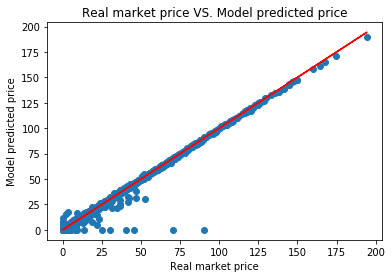

In [16]:
plt.plot(Y_test,predicted,'o')
plt.plot(Y_test,f(Y_test),'r-')
plt.title('Real market price VS. Model predicted price')
plt.xlabel('Real market price')
plt.ylabel('Model predicted price')
plt.show()

In [41]:
diff = {}
for i,pred in enumerate(predicted):
    diff[i]=abs(pred-Y_test[i])
diff = zip(diff.values(),diff.keys())
top10 = sorted(diff)[:10]
print("Top 10 matches\n")
for item in top10:
    ind = item[1]
    print("Real Market Price is: {}".format(Y_test[ind]))
    print("Model Predicted Price is: {}\n".format(predicted[ind]))

Top 10 matches

Real Market Price is: [43.72499847]
Model Predicted Price is: [43.724792]

Real Market Price is: [2.47000003]
Model Predicted Price is: [2.4702091]

Real Market Price is: [24.95000076]
Model Predicted Price is: [24.949577]

Real Market Price is: [50.47499847]
Model Predicted Price is: [50.47622]

Real Market Price is: [15.125]
Model Predicted Price is: [15.127515]

Real Market Price is: [106.67500305]
Model Predicted Price is: [106.677956]

Real Market Price is: [122.69999695]
Model Predicted Price is: [122.696945]

Real Market Price is: [2.59500003]
Model Predicted Price is: [2.5983906]

Real Market Price is: [17.27499962]
Model Predicted Price is: [17.278416]

Real Market Price is: [50.57500076]
Model Predicted Price is: [50.579277]



In [48]:
diff = {}
for i,pred in enumerate(predicted):
    diff[i]=abs(pred-Y_test[i])
diff = zip(diff.values(),diff.keys())
worst10 = sorted(diff,reverse=True)[:10]
print("Worst 10 matches\n")
for item in worst10:
    ind = item[1]
    print("Real Market Price is: {}".format(Y_test[ind]))
    print("Model Predicted Price is: {}\n".format(predicted[ind]))

Worst 10 matches

Real Market Price is: [90.375]
Model Predicted Price is: [0.]

Real Market Price is: [70.65000153]
Model Predicted Price is: [0.]

Real Market Price is: [45.375]
Model Predicted Price is: [0.]

Real Market Price is: [40.375]
Model Predicted Price is: [0.]

Real Market Price is: [30.5]
Model Predicted Price is: [0.]

Real Market Price is: [25.375]
Model Predicted Price is: [0.]

Real Market Price is: [52.40000153]
Model Predicted Price is: [30.574669]

Real Market Price is: [21.70000076]
Model Predicted Price is: [5.289818]

Real Market Price is: [47.09999847]
Model Predicted Price is: [31.670918]

Real Market Price is: [41.875]
Model Predicted Price is: [27.015781]

